# Playground Notebook

Notebook to test and run things on the spot...

In [1]:
# Let's first load all required packages...
import os
import pandas as pd

from config import *
from bball_stats import *
import tools

In [2]:
game_id = 2004609  # 2 overtimes
game_id = 1976446  # different names capitalisation - 6 players
# game_id = 2031329 # players come 
# game_id = 2004608  # Period 2 05.600 - B. Kuol (team 2) come out, but then in and out

game_id = 1976449   # M. Makers goes in (for Martin) even though he is already there! So 4 players are left with Martin off
# game_id = 1976457   # same issue with Makers, he goes in even though he is on court!

# game_id = 2031329

## 1. Check for strange subs

Compute all data first:

In [9]:
set_logging("INFO")

game_json = tools.get_json_data(game_id)
starters = get_starters(game_json, 1)
pbp_df = get_pbp_df(game_json)
stints = pbp_stints_extract(pbp_df, starters, 1)

result = build_game_stints_stats_df(game_id)
stats_df = result['stint_stats_df']
pbp_df = result['pbp_df']
team1, team2 = result['teams']

2022-07-31 21:14:29 WARNING Sub team 1 at 00:04:35 in period 2: incoming players already in court: {'M. Maker'}
2022-07-31 21:14:29 WARNING Sub team 1 at 00:01:29 in period 2: outcoming players not in court: {'M. Maker'}
2022-07-31 21:14:29 WARNING Sub team 1 at 00:04:35 in period 2: incoming players already in court: {'M. Maker'}
2022-07-31 21:14:29 WARNING Sub team 1 at 00:01:29 in period 2: outcoming players not in court: {'M. Maker'}


In [10]:
# get the stint of the team you want to study
tno  = 1
stints_df = result['stints_df'].query("tno == @tno")

stints_df

,id,lineup,intervals,mins,tno,team
0,1,"[A. Glover, J. Martin, S. Bruce, W. Swaka Lo B...","[(1, 00:10:00, 00:05:09), (2, 00:10:00, 00:06:...",18.333333,1,Sydney Kings
1,2,"[A. Glover, B. Bayles, J. Martin, S. Bruce, T....","[(1, 00:05:09, 00:03:41)]",1.466667,1,Sydney Kings
2,3,"[A. Glover, B. Bayles, J. Galloway, M. Maker, ...","[(1, 00:03:41, 00:03:04)]",0.616667,1,Sydney Kings
3,4,"[B. Bayles, J. Galloway, M. Maker, T. Vodanovi...","[(1, 00:03:04, 00:01:06), (3, 00:02:46, 00:00:...",4.733333,1,Sydney Kings
4,5,"[B. Bayles, J. Galloway, M. Maker, W. Swaka Lo...","[(1, 00:01:06, 00:00:00), (2, 00:10:00, 00:10:...",1.100000,1,Sydney Kings
5,6,"[A. Glover, J. Martin, M. Maker, S. Bruce, T. ...","[(2, 00:06:18, 00:05:59)]",0.316667,1,Sydney Kings
6,7,"[A. Glover, B. Bayles, J. Martin, M. Maker, T....","[(2, 00:05:59, 00:04:35)]",1.400000,1,Sydney Kings
7,8,"[A. Glover, B. Bayles, M. Maker, T. Vodanovich]","[(2, 00:04:35, 00:03:18)]",1.283333,1,Sydney Kings
8,9,"[B. Bayles, J. Galloway, W. Swaka Lo Buluk, X....","[(2, 00:03:18, 00:01:29)]",1.816667,1,Sydney Kings
9,10,"[B. Bayles, J. Galloway, J. Martin, W. Swaka L...","[(2, 00:01:29, 00:01:20)]",0.150000,1,Sydney Kings


In [11]:
# get stints with not 5 players
mask = stints_df['lineup'].apply(lambda x: len(x) != 5)
stints_df[mask]

,id,lineup,intervals,mins,tno,team
7,8,"[A. Glover, B. Bayles, M. Maker, T. Vodanovich]","[(2, 00:04:35, 00:03:18)]",1.283333,1,Sydney Kings
8,9,"[B. Bayles, J. Galloway, W. Swaka Lo Buluk, X....","[(2, 00:03:18, 00:01:29)]",1.816667,1,Sydney Kings


In [ ]:
cols = ['team_name', 'player', 'period', 'clock', 'subType', 'actionNumber']
sub = pbp_df.loc[(pbp_df['actionType'] == 'substitution') & 
                     (pbp_df['tno'] == 2) &
                     (pbp_df['period'] == 4)][cols]

# player_name = "B. Kuol"   # game 2004608
# sub = pbp_df.loc[(pbp_df['actionType'] == 'substitution') &    # all subs done in period
#                             (pbp_df['player'] == player_name)][cols]
                            # (pbp_df['player'] == player_name) & (pbp_df['period'] == 1)]

# player_name = "J. McVeigh"    # game 1976446
# sub = pbp_df.loc[(pbp_df['actionType'] == 'substitution') & 
#                  (pbp_df['period'] == 5) &
#                  (pbp_df['tno'] == 1) &
#                  (pbp_df['player'] == player_name)][cols]

sub
# pbp_df
# sub['clock'].unique()

# sub.drop_duplicates(subset=['clock', 'player'], keep='last')

In [3]:
set_logging('INFO')

game_json = tools.get_json_data(game_id)
pl = pl_df = get_game_players(game_json, 1)
pbp_all_df = get_pbp_df(game_json)


In [4]:
pbp_all_df.loc[(pbp_all_df['actionType'] == 'substitution') &    # all subs done in period
                            (pbp_all_df['tno'] == 2) &
                            (pbp_all_df['period'] == 1)]

,team_name,team_short_name,clock,s1,s2,lead,tno,period,periodType,pno,player,success,actionType,actionNumber,previousAction,qualifier,subType,scoring
458,Melbourne United,United,00:05:48,5,9,-4,2,1,REGULAR,15,C. Agada,1,substitution,68,,[],out,0
459,Melbourne United,United,00:05:48,5,9,-4,2,1,REGULAR,3,C. Goulding,1,substitution,69,,[],out,0
457,Melbourne United,United,00:05:48,5,9,-4,2,1,REGULAR,2,B. Newley,1,substitution,70,,[],in,0
456,Melbourne United,United,00:05:48,5,9,-4,2,1,REGULAR,5,S. Ili,1,substitution,71,,[],in,0
446,Melbourne United,United,00:05:02,8,11,-3,2,1,REGULAR,6,J. White,1,substitution,81,,[],out,0
447,Melbourne United,United,00:05:02,8,11,-3,2,1,REGULAR,1,D. Barlow,1,substitution,82,,[],in,0
438,Melbourne United,United,00:04:37,8,11,-3,2,1,REGULAR,9,J. Lual-Acuil,1,substitution,91,,[],out,0
439,Melbourne United,United,00:04:37,8,11,-3,2,1,REGULAR,13,A. Hukporti,1,substitution,92,,[],in,0
434,Melbourne United,United,00:04:23,8,11,-3,2,1,REGULAR,12,M. Dellavedova,1,substitution,97,,[],out,0
435,Melbourne United,United,00:04:23,8,11,-3,2,1,REGULAR,15,C. Agada,1,substitution,98,,[],in,0


In [ ]:
for st in stints.keys():
    print(st, stints[st])

frozenset({'S. Zimmerman', 'T. McCall', 'M. Deng', 'S. Machado', 'K. Noi'}) [(1, datetime.time(0, 10), datetime.time(0, 0)), (2, datetime.time(0, 10), datetime.time(0, 0)), (3, datetime.time(0, 10), datetime.time(0, 0)), (4, datetime.time(0, 10), datetime.time(0, 0))]


In [ ]:
# (ortg, drtg) should mirror (drtg_opp, ortg)
stats_df.iloc[4][['poss', 'ortg', 'drtg', "poss_opp", "ortg_opp", "drtg_opp"]]

poss          1
ortg        200
drtg          0
poss_opp      1
ortg_opp      0
drtg_opp    200
Name: 4, dtype: object

In [ ]:
df.loc[(df['periodType'] == "OVERTIME") & (df['period'] == 2)]

,team_name,team_short_name,clock,s1,s2,lead,tno,period,periodType,pno,player,success,actionType,actionNumber,previousAction,qualifier,subType,scoring,game_id
57,,,00:05:00,84,84,0,0,2,OVERTIME,0,nan. nan,1,period,771,,[],start,0,2004609
58,Perth Wildcats,Wildcats,00:05:00,84,84,0,1,2,OVERTIME,1,T. Blanchfield,1,substitution,769,,[],out,0,2004609
59,Perth Wildcats,Wildcats,00:05:00,84,84,0,1,2,OVERTIME,11,L. Travers,1,substitution,770,,[],in,0,2004609
56,Brisbane Bullets,BULLETS,00:04:46,84,84,0,2,2,OVERTIME,12,R. Franks,0,2pt,773,,[pointsinthepaint],stepbackjumpshot,1,2004609
55,Perth Wildcats,Wildcats,00:04:43,84,84,0,1,2,OVERTIME,6,M. Majok,1,rebound,774,773,[],defensive,0,2004609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,Illawarra Hawks,Hawks,00:00:02.800000,97,96,1,1,2,OVERTIME,9,T. Harvey,1,2pt,792,,[pointsinthepaint],floatingjumpshot,1,1976459
2,Illawarra Hawks,Hawks,00:00:01,97,96,1,1,2,OVERTIME,15,X. Rathan-Mayes,1,steal,802,801,[],,0,1976459
3,New Zealand Breakers,Breakers,00:00:01,97,96,1,2,2,OVERTIME,13,H. Besson,1,turnover,801,,[],ballhandling,0,1976459
0,,,00:00:00,97,96,1,0,2,OVERTIME,0,nan. nan,1,game,806,,[confirmed],end,0,1976459


In [ ]:
over = df.loc[(df['periodType'] == "OVERTIME"), ['period', 'periodType']].drop_duplicates().to_records(index=False).tolist()
regular = list(zip(range(1, 5), ["REGULAR"]*4))

periods = regular + over
# for (period, period_type) in zip(range(1, 5), ["REGULAR"]*4) + over:
#     print(period, period_type)

[(1, 'REGULAR'),
 (2, 'REGULAR'),
 (3, 'REGULAR'),
 (4, 'REGULAR'),
 (1, 'OVERTIME'),
 (2, 'OVERTIME')]

## 2. Inspect PBP of a particular stint lineup

In [ ]:
stints1_df.loc[stints1_df['id'] == 1, 'intervals'].tolist()

[[(1, datetime.time(0, 10), datetime.time(0, 3, 44)),
  (2, datetime.time(0, 3, 52), datetime.time(0, 0)),
  (3, datetime.time(0, 10), datetime.time(0, 10))]]

In [ ]:
lineup = stints1_df
intervals = stints1_df.loc[stints1_df['id'] ==1, 'intervals'].tolist()[0]
mask = bball_stats.pbp_get_ranges_mask(pbp_df, intervals)

print(intervals)
pbp2_df = bball_stats.pbp_get_ranges_df(pbp_df, intervals)
pbp2_df.loc[(pbp2_df['actionType'] == "rebound") & (pbp2_df['tno'] == 2)]

# stats_df.loc[(stats_df['tno'] == 1) & (stats_df['stint'] == 1)][['reb_opp', 'oreb_opp', "dreb_opp"]]
# stats_df.loc[(stats_df['tno'] == 1) & (stats_df['stint'] == 1)][['reb', 'oreb', "dreb"]]

# pbp_df["stint1"]

[(1, datetime.time(0, 10), datetime.time(0, 3, 44)), (2, datetime.time(0, 3, 52), datetime.time(0, 0)), (3, datetime.time(0, 10), datetime.time(0, 10))]


,team_name,team_short_name,clock,s1,s2,lead,tno,period,periodType,pno,player,success,actionType,actionNumber,previousAction,qualifier,subType,scoring,stint1,stint2
3,New Zealand Breakers,Breakers,00:09:32,0,0,0,2,1,REGULAR,4,W. McDowell-White,1,rebound,8,7,[],offensive,0,1,1
8,New Zealand Breakers,Breakers,00:09:10,0,0,0,2,1,REGULAR,14,J. Martin,1,rebound,15,13,[],offensive,0,1,1
9,New Zealand Breakers,Breakers,00:09:09,0,0,0,2,1,REGULAR,0,,1,rebound,19,17,[team],offensive,0,1,1
22,New Zealand Breakers,Breakers,00:08:30,2,0,2,2,1,REGULAR,2,F. Delany,1,rebound,33,32,[],defensive,0,1,1
50,New Zealand Breakers,Breakers,00:05:09,14,4,10,2,1,REGULAR,2,F. Delany,1,rebound,70,69,[],offensive,0,1,1
54,New Zealand Breakers,Breakers,00:04:39,14,6,8,2,1,REGULAR,13,H. Besson,1,rebound,74,73,[],defensive,0,1,1
59,New Zealand Breakers,Breakers,00:04:15,14,6,8,2,1,REGULAR,4,W. McDowell-White,1,rebound,79,78,[],defensive,0,1,1
63,New Zealand Breakers,Breakers,00:03:49,14,8,6,2,1,REGULAR,2,F. Delany,1,rebound,83,82,[],defensive,0,1,1
169,New Zealand Breakers,Breakers,00:03:09,27,22,5,2,2,REGULAR,0,,1,rebound,289,288,[],offensivedeadball,0,1,9
175,New Zealand Breakers,Breakers,00:02:55,27,23,4,2,2,REGULAR,0,,1,rebound,296,294,[team],defensive,0,1,9


## 3. Basic aggregaste statistics from PBP

Extract plays for a stint lineup.

Inspect possible actions in a play

In [ ]:
# inspect all actions and sub-actions that can be done in a play
actions = bball_stats.pbp_get_actions(pbp_df)
actions

,subType
actionType,
2pt,floatingjumpshot
2pt,drivinglayup
2pt,layup
2pt,hookshot
2pt,stepbackjumpshot
2pt,jumpshot
2pt,fadeaway
2pt,pullupjumpshot
2pt,dunk


Let's do a pivot table. Doc:

* https://pandas.pydata.org/docs/user_guide/reshaping.html
* https://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/


In [ ]:
pivot_stat = pbp_df.pivot_table(
    index=['team_short_name', 'stint1'],
    columns=['actionType', 'subType'],
    values='actionNumber', aggfunc=len, fill_value=0)

# should be equivalent but it does not work.. :-(
# pd.crosstab(pbp2_df, ['team_short_name', 'stint1'], 'actionType', aggfunc=len)

# pivot_stat.info()
# pivot_stat.reset_index(inplace=True)

pivot_stat['2pt']
pivot_stat

KeyError: 'stint1'

In [ ]:
# columns are in two levels
pivot_stat.columns

MultiIndex([(      '2pt',       'drivinglayup'),
            (      '2pt',               'dunk'),
            (      '2pt',           'fadeaway'),
            (      '2pt',   'floatingjumpshot'),
            (      '2pt',           'hookshot'),
            (      '2pt',           'jumpshot'),
            (      '2pt',              'layup'),
            (      '2pt',     'pullupjumpshot'),
            (      '2pt',   'stepbackjumpshot'),
            (      '2pt', 'turnaroundjumpshot'),
            (      '3pt',           'jumpshot'),
            (      '3pt',     'pullupjumpshot'),
            (      '3pt',   'stepbackjumpshot'),
            (   'assist',                   ''),
            (    'block',                   ''),
            (     'foul',          'offensive'),
            (     'foul',           'personal'),
            (   'foulon',                   ''),
            ('freethrow',               '1of1'),
            ('freethrow',               '1of2'),
            ('freeth

In [ ]:
# Collapse two level columns into single level
pivot_stat2_df = pivot_stat.copy()

# collapse complex columns into a single flat one
pivot_stat2_df.columns = ['_'.join(col) for col in pivot_stat.columns.values]
pivot_stat2_df.columns
# pivot_stat2_df.head()

Index(['2pt_drivinglayup', '2pt_dunk', '2pt_fadeaway', '2pt_floatingjumpshot',
       '2pt_hookshot', '2pt_jumpshot', '2pt_layup', '2pt_pullupjumpshot',
       '2pt_stepbackjumpshot', '2pt_turnaroundjumpshot', '3pt_jumpshot',
       '3pt_pullupjumpshot', '3pt_stepbackjumpshot', 'assist_', 'block_',
       'foul_offensive', 'foul_personal', 'foulon_', 'freethrow_1of1',
       'freethrow_1of2', 'freethrow_2of2', 'jumpball_lost', 'jumpball_won',
       'rebound_defensive', 'rebound_offensive', 'rebound_offensivedeadball',
       'steal_', 'timeout_full', 'turnover_badpass', 'turnover_ballhandling',
       'turnover_offensive', 'turnover_outofbounds'],
      dtype='object')

In [ ]:
pivot_stat2_df.to_csv("stint1_stats.csv", index=False)

## 5. Plotting

- https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

Game Melbourne United (United) vs Tasmania JackJumpers (JackJumpers)
Play-by-play df for game 2087737: (566, 18)
Starters for Melbourne United:
	 {'C. Agada', 'J. White', 'M. Dellavedova', 'J. Lual-Acuil Jr', 'S. Ili'}
Starters for Tasmania JackJumpers:
	 {'J. Mcveigh', 'J. Magette', 'J. Adams', 'F. Krslovic', 'M. Kenyon'}
Game Tasmania JackJumpers (JackJumpers) vs Sydney Kings (Kings)
Play-by-play df for game 2090351: (552, 18)
Starters for Tasmania JackJumpers:
	 {'J. Mcveigh', 'J. Magette', 'J. Adams', 'F. Krslovic', 'M. Kenyon'}
Starters for Sydney Kings:
	 {'X. Cooks', 'I. Clark', 'J. Martin', 'D. Vasiljevic', 'W. Swaka Lo Buluk'}


,tno,stint,game_no1,game_no2,poss,ortg,drtg,net_rtg,fga,fgm,...,badpass_opp,ofoul_opp,3sec_opp,8sec_opp,24sec_opp,opp_fga_blocked_opp,id,lineup,intervals,mins
36,2,18,92,91,2.44,122.95,150.00,-27.05,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,18,"(X. Cooks, D. Vasiljevic, I. Clark, W. Swaka L...","[(4, 00:08:24, 00:07:51)]",0.55
11,1,13,31,30,1.88,0.00,159.57,-159.57,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13,"(Y. Baba, C. Agada, J. White, M. Dellavedova, ...","[(3, 00:04:21, 00:03:06)]",1.25
13,1,15,31,30,4.88,122.95,100.00,22.95,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,15,"(Y. Baba, M. Peatling, C. Agada, S. Ili, J. Lu...","[(3, 00:01:46, 00:00:00), (4, 00:10:00, 00:09:...",2.20
16,1,17,92,91,2.00,150.00,122.95,27.05,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17,"(C. Steindl, J. Weeks, J. Mcveigh, F. Krslovic...","[(4, 00:08:24, 00:07:51)]",0.55
9,1,11,31,30,2.00,150.00,100.00,50.00,3.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,11,"(B. Newley, M. Peatling, S. Ili, M. Dellavedov...","[(2, 00:01:06, 00:00:00), (3, 00:10:00, 00:10:...",1.10


In [ ]:
stats_df.to_csv("stats.csv")

In [ ]:
import dtale

dtale.show(stats_df[['tno', 'stint', 'poss', 'ortg', 'drtg', "poss_opp", "ortg_opp", "drtg_opp"]])

Executing shutdown due to inactivity...


2022-07-03 15:55:27,111 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-07-03 15:55:27,131 - INFO     - Executing shutdown...


In [ ]:
# plot using standard panda plot
# Shooting stats for team 1
axis_y = ['2pt_fga', "2pt_fgm", '3pt_fga', "3pt_fgm"]
stats_df[stats_df.tno == 1].plot(kind="bar", x='stint', y=axis_y, title="2pts stats for team 1", xlabel="stint id")

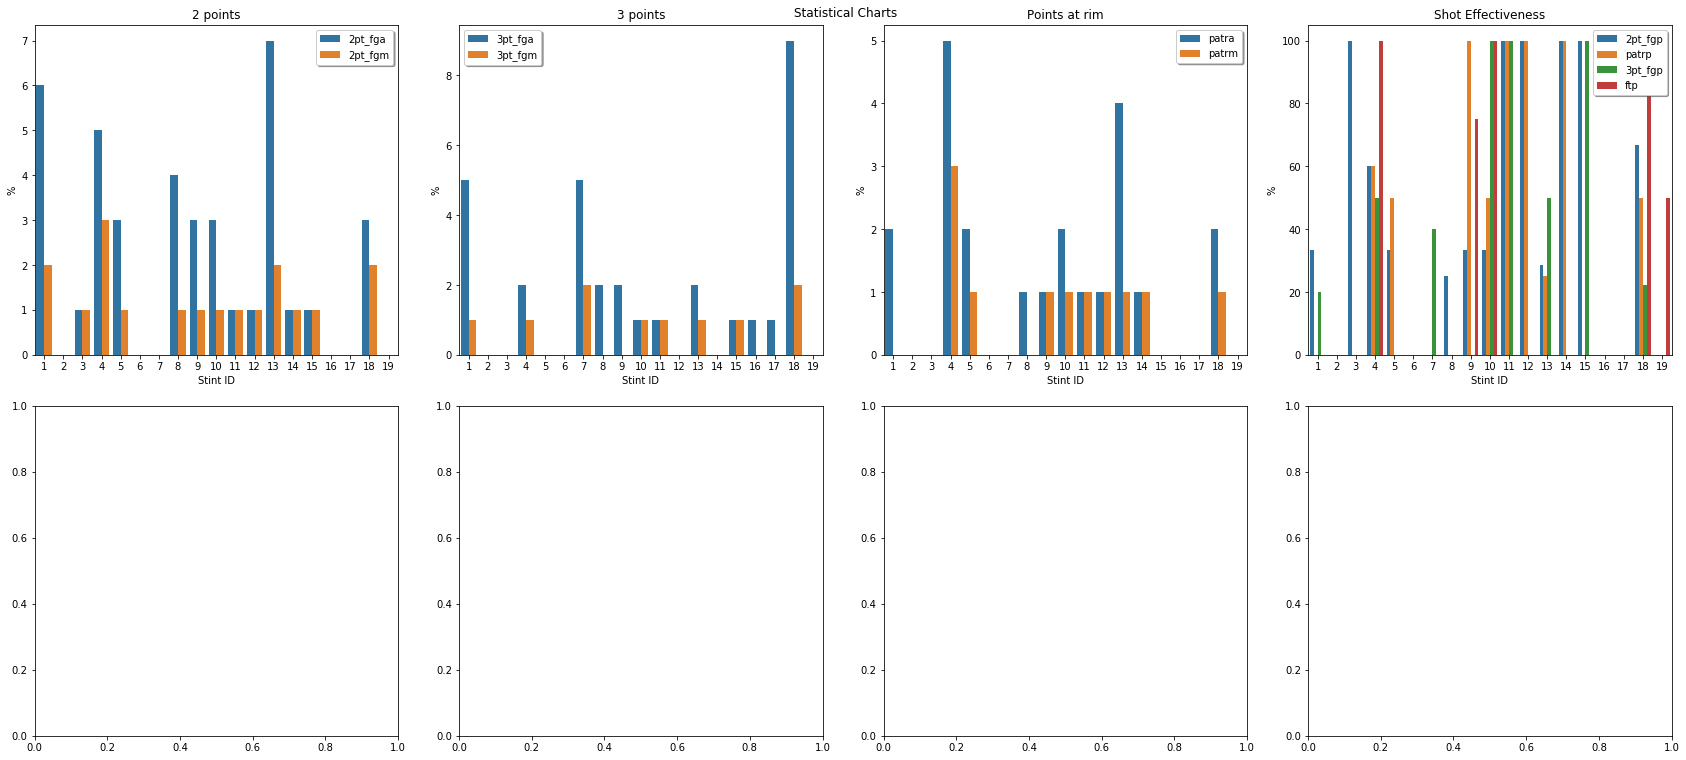

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def graph_points(stats_df: pd.DataFrame, col_aggreg: str):

    # First, let's create the overal matrix of subplots
    fig_size = (2, 4)
    # # # Create a 3x5 matrix of subplots and add padding around them for readability.
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html?highlight=subplot#matplotlib.pyplot.subplot
    fig, axes = plt.subplots(nrows=fig_size[0], ncols=fig_size[1], figsize=(24, 11))
    # fig.subplots_adjust(top=0.8)
    # fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    fig.tight_layout(pad=3.0)
    fig.suptitle("Statistical Charts")


    axis = axes[0, 0]
    df = stats_df[[col_aggreg, '2pt_fga', '2pt_fgm']].melt(id_vars=col_aggreg,  value_name='value', var_name='class')
    g = sns.barplot(ax=axis, data=df, x=col_aggreg, y='value', hue='class')
    g.set_title("2 points")
    g.set_xlabel("Stint ID")
    g.set_ylabel("%")
    g.set_label("sss")
    g.legend(shadow=True) # https://www.dataforeverybody.com/seaborn-legend-change-location-size/

    axis = axes[0, 1]
    df = stats_df[[col_aggreg, '3pt_fga', '3pt_fgm']].melt(id_vars=col_aggreg,  value_name='value', var_name='class')
    g = sns.barplot(ax=axis, data=df, x=col_aggreg, y='value', hue='class')
    g.set_title("3 points")
    g.set_xlabel("Stint ID")
    g.set_ylabel("%")
    g.set_label("sss")
    g.legend(shadow=True) # https://www.dataforeverybody.com/seaborn-legend-change-location-size/

    axis = plt.subplot(fig_size[0], fig_size[1], 3)
    df = stats_df[[col_aggreg, 'patra', 'patrm']].melt(id_vars=col_aggreg,  value_name='value', var_name='class')
    g = sns.barplot(ax=axis, data=df, x=col_aggreg, y='value', hue='class')
    g.set_title("Points at rim")
    g.set_xlabel("Stint ID")
    g.set_ylabel("%")
    g.legend(shadow=True)


    axis = plt.subplot(fig_size[0], fig_size[1], 4)
    df = stats_df[[col_aggreg, '2pt_fgp', 'patrp', '3pt_fgp', 'ftp']].melt(id_vars=col_aggreg,  value_name='value', var_name='class')
    g = sns.barplot(ax=axis, data=df, x=col_aggreg, y='value', hue='class')
    axis.set_title("Shot Effectiveness")
    g.set_title("Shot Effectiveness")
    g.set_xlabel("Stint ID")
    g.set_ylabel("%")
    g.legend(shadow=True)


graph_points(stats_df.loc[stats_df['tno'] == 2], 'stint')

In [ ]:
stints1_df['tno'] = 1
stints1_df

,id,lineup,intervals,tno
0,1,"(C. Agada, J. White, M. Dellavedova, S. Ili, J...","[(1, 00:10:00, 00:05:53), (2, 00:10:00, 00:07:...",1
1,2,"(C. Agada, J. White, Y. Baba, M. Dellavedova, ...","[(1, 00:05:53, 00:05:05), (2, 00:07:36, 00:04:...",1
2,3,"(B. Newley, J. White, Y. Baba, M. Dellavedova,...","[(1, 00:05:05, 00:04:29)]",1
3,4,"(M. Peatling, Y. Baba, B. Newley, S. Ili, J. L...","[(1, 00:04:29, 00:03:26)]",1
4,5,"(A. Hukporti, M. Peatling, Y. Baba, B. Newley,...","[(1, 00:03:26, 00:01:16)]",1
5,6,"(A. Hukporti, C. Agada, J. White, B. Newley, S...","[(1, 00:01:16, 00:00:55.700000)]",1
6,7,"(A. Hukporti, C. Agada, J. White, M. Dellavedo...","[(1, 00:00:55.700000, 00:00:00), (2, 00:10:00,...",1
7,8,"(D. Barlow, C. Agada, Y. Baba, S. Ili, J. Lual...","[(2, 00:04:46, 00:03:48)]",1
8,9,"(A. Hukporti, Y. Baba, B. Newley, S. Ili, D. B...","[(2, 00:03:48, 00:02:15)]",1
9,10,"(A. Hukporti, M. Peatling, B. Newley, S. Ili, ...","[(2, 00:02:15, 00:01:06)]",1


In [ ]:
import dtale

dtale.show(stats_df)

# Web page scraping

tools.get_game_info(1976446)
# import datetime
# datetime.datetime.strptime("3/2/89", "%d/%m/%y")